In [6]:

from __future__ import print_function
from __future__ import absolute_import

import warnings
import numpy as np
import tensorflow as tf
from tensorflow import keras
from functools import partial
from keras import backend as K
from keras.models import Model
from tensorflow.keras import layers
from keras.layers import concatenate
from keras.utils.data_utils import get_file
from tensorflow.keras.utils import plot_model
from keras.utils.layer_utils import get_source_inputs
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.layers import Activation, AveragePooling2D, BatchNormalization, Concatenate,Conv2D,Dense,Dropout,GlobalAveragePooling2D,GlobalMaxPooling2D,Input,Lambda,MaxPooling2D



In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

# Function to extract features from images
def extract_features(image_paths, target_size=(130, 130)):
    features = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)
        feature = base_model.predict(img_array)
        features.append(feature.flatten())
    return np.array(features)

# Directory paths
falciparum_path = "final_dataset1_normalized/Falciparum"
vivax_path = "final_dataset1_normalized/Vivax"
uninfected_path = "final_dataset1_normalized/Uninfected"

# Load InceptionResNetV2 model without top layers
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(130, 130, 3))

# Get image paths
falciparum_images = [os.path.join(falciparum_path, img) for img in os.listdir(falciparum_path)]
vivax_images = [os.path.join(vivax_path, img) for img in os.listdir(vivax_path)]
uninfected_images = [os.path.join(uninfected_path, img) for img in os.listdir(uninfected_path)]

# Extract features for each category
falciparum_features = extract_features(falciparum_images)
vivax_features = extract_features(vivax_images)
uninfected_features = extract_features(uninfected_images)

# Combine features and labels
X = np.concatenate((falciparum_features, vivax_features, uninfected_features), axis=0)
y = np.concatenate((np.zeros(len(falciparum_features)), np.ones(len(vivax_features)), np.full(len(uninfected_features), 2)), axis=0)

# Shuffle data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]

# Split data into train and test sets (you may need to adjust the split ratio)
split_ratio = 0.8
split_index = int(split_ratio * len(X_shuffled))
X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]

print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))


1/1 [==============================] - 0s 381ms/step


1/1 [==============================] - 0s 355ms/step


1/1 [==============================] - 0s 298ms/step


1/1 [==============================] - 1s 561ms/step


1/1 [==============================] - 0s 443ms/step


1/1 [==============================] - 0s 309ms/step


1/1 [==============================] - 1s 516ms/step


1/1 [==============================] - 1s 505ms/step


1/1 [==============================] - 0s 435ms/step


1/1 [==============================] - 1s 642ms/step
Number of training samples: 2316
Number of test samples: 579


# With Gray World Normalization

Accuracy: 0.998272884283247
Precision: 0.9982813505367605
Recall: 0.998272884283247


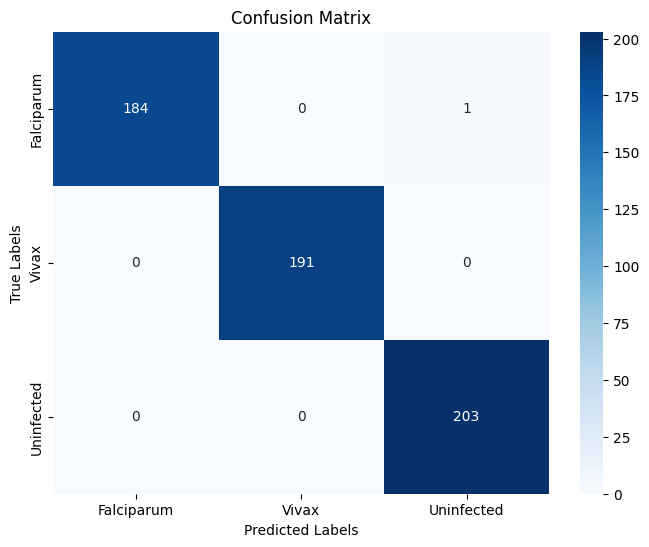

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Falciparum', 'Vivax', 'Uninfected'], yticklabels=['Falciparum', 'Vivax', 'Uninfected'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9602763385146805
Precision: 0.9643190120286731
Recall: 0.9602763385146805


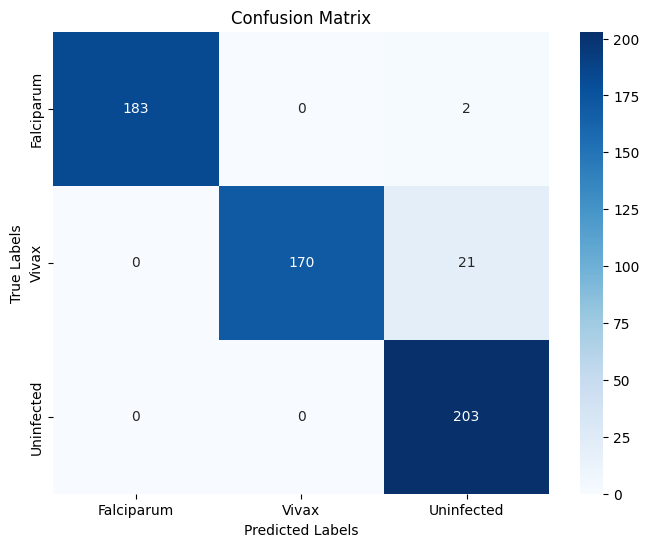

In [15]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize AdaBoost classifier with decision tree as base estimator
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = ada_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Falciparum', 'Vivax', 'Uninfected'], yticklabels=['Falciparum', 'Vivax', 'Uninfected'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# WITH basic PREPROCESSING

In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

# Function to extract features from images
def extract_features(image_paths, target_size=(130, 130)):
    features = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)
        feature = base_model.predict(img_array)
        features.append(feature.flatten())
    return np.array(features)

# Directory paths
falciparum_path = "preprocessed_dataset/Falciparum"
vivax_path = "preprocessed_dataset/Vivax"
uninfected_path = "preprocessed_dataset/Uninfected"

# Load InceptionResNetV2 model without top layers
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(130, 130, 3))

# Get image paths
falciparum_images = [os.path.join(falciparum_path, img) for img in os.listdir(falciparum_path)]
vivax_images = [os.path.join(vivax_path, img) for img in os.listdir(vivax_path)]
uninfected_images = [os.path.join(uninfected_path, img) for img in os.listdir(uninfected_path)]

# Extract features for each category
falciparum_features = extract_features(falciparum_images)
vivax_features = extract_features(vivax_images)
uninfected_features = extract_features(uninfected_images)

# Combine features and labels
X = np.concatenate((falciparum_features, vivax_features, uninfected_features), axis=0)
y = np.concatenate((np.zeros(len(falciparum_features)), np.ones(len(vivax_features)), np.full(len(uninfected_features), 2)), axis=0)

# Shuffle data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]

# Split data into train and test sets (you may need to adjust the split ratio)
split_ratio = 0.8
split_index = int(split_ratio * len(X_shuffled))
X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]

print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 96ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 94ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 78ms/step
Number of training samples: 2316
Number of test samples: 579


Accuracy: 0.9965457685664939
Precision: 0.9965817501439264
Recall: 0.9965457685664939


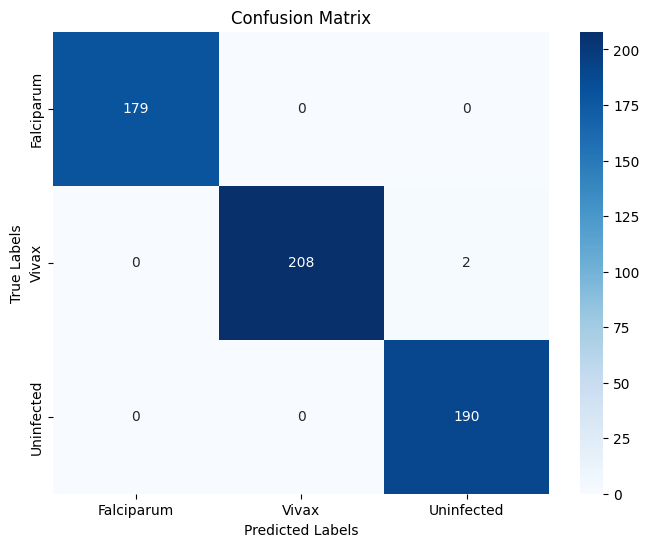

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Falciparum', 'Vivax', 'Uninfected'], yticklabels=['Falciparum', 'Vivax', 'Uninfected'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.9758203799654577
Precision: 0.977058723395187
Recall: 0.9758203799654577


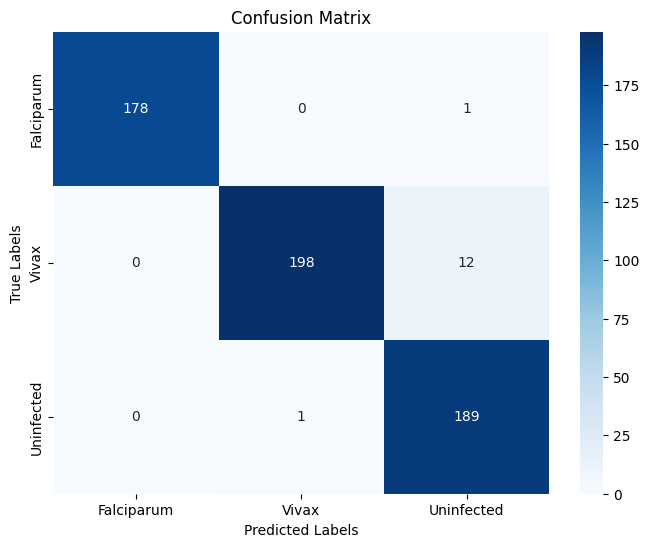

In [3]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize AdaBoost classifier with decision tree as base estimator
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = ada_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Falciparum', 'Vivax', 'Uninfected'], yticklabels=['Falciparum', 'Vivax', 'Uninfected'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# WITHOUT PROCESSING

In [4]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input

# Function to extract features from images
def extract_features(image_paths, target_size=(130, 130)):
    features = []
    for image_path in image_paths:
        img = load_img(image_path, target_size=target_size)
        img_array = img_to_array(img)
        img_array = preprocess_input(img_array)
        img_array = np.expand_dims(img_array, axis=0)
        feature = base_model.predict(img_array)
        features.append(feature.flatten())
    return np.array(features)

# Directory paths
falciparum_path = "final_dataset1/Falciparum"
vivax_path = "final_dataset1/Vivax"
uninfected_path = "final_dataset1/Uninfected"

# Load InceptionResNetV2 model without top layers
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(130, 130, 3))

# Get image paths
falciparum_images = [os.path.join(falciparum_path, img) for img in os.listdir(falciparum_path)]
vivax_images = [os.path.join(vivax_path, img) for img in os.listdir(vivax_path)]
uninfected_images = [os.path.join(uninfected_path, img) for img in os.listdir(uninfected_path)]

# Extract features for each category
falciparum_features = extract_features(falciparum_images)
vivax_features = extract_features(vivax_images)
uninfected_features = extract_features(uninfected_images)

# Combine features and labels
X = np.concatenate((falciparum_features, vivax_features, uninfected_features), axis=0)
y = np.concatenate((np.zeros(len(falciparum_features)), np.ones(len(vivax_features)), np.full(len(uninfected_features), 2)), axis=0)

# Shuffle data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X_shuffled = X[indices]
y_shuffled = y[indices]

# Split data into train and test sets (you may need to adjust the split ratio)
split_ratio = 0.8
split_index = int(split_ratio * len(X_shuffled))
X_train, X_test = X_shuffled[:split_index], X_shuffled[split_index:]
y_train, y_test = y_shuffled[:split_index], y_shuffled[split_index:]

print("Number of training samples:", len(X_train))
print("Number of test samples:", len(X_test))


1/1 [==============================] - 0s 133ms/step


1/1 [==============================] - 0s 106ms/step


1/1 [==============================] - 0s 73ms/step


1/1 [==============================] - 0s 124ms/step


1/1 [==============================] - 0s 85ms/step


1/1 [==============================] - 0s 86ms/step


1/1 [==============================] - 0s 138ms/step


1/1 [==============================] - 0s 153ms/step


1/1 [==============================] - 0s 141ms/step


1/1 [==============================] - 0s 139ms/step
Number of training samples: 2316
Number of test samples: 579


Accuracy: 0.9464594127806563
Precision: 0.946541325691426
Recall: 0.9464594127806563


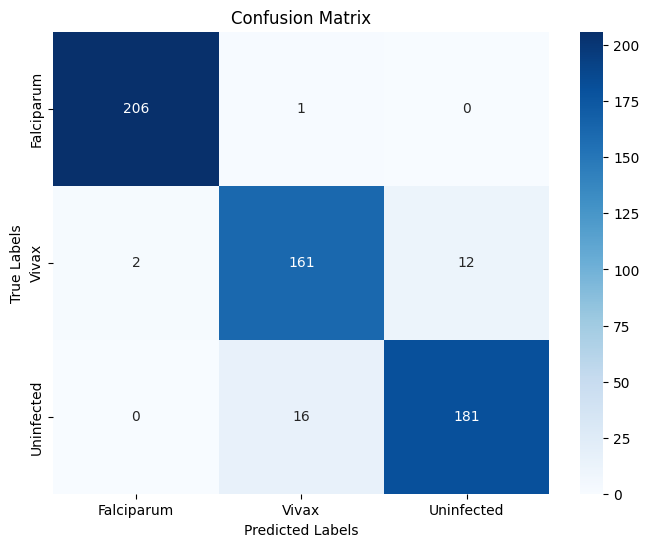

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Falciparum', 'Vivax', 'Uninfected'], yticklabels=['Falciparum', 'Vivax', 'Uninfected'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Accuracy: 0.8497409326424871
Precision: 0.8522589317917572
Recall: 0.8497409326424871


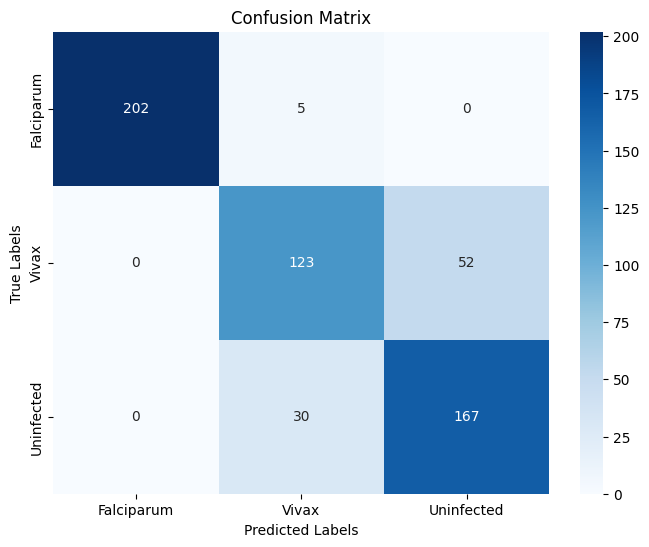

In [6]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize AdaBoost classifier with decision tree as base estimator
ada_classifier = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the classifier
ada_classifier.fit(X_train, y_train)

# Predict on test set
y_pred = ada_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Falciparum', 'Vivax', 'Uninfected'], yticklabels=['Falciparum', 'Vivax', 'Uninfected'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()
